<a href="https://colab.research.google.com/github/fernanda0402/Doutorado/blob/main/Supernovas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import urllib.request #usar biblioteca Pandas para ler o arquivo como um DataFrame e pular a primeira linha com o cabeçalho
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import sympy as sm
import scipy as sp
import math
from matplotlib import rc
from numpy import loadtxt, savetxt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 1) BAIXANDO O ARQUIVO (SEM COVARIÂNCIA)

url = "https://raw.githubusercontent.com/PantheonPlusSH0ES/DataRelease/main/Pantheon%2B_Data/4_DISTANCES_AND_COVAR/Pantheon%2BSH0ES.dat"
filename = "Pantheon+SH0ES.dat"

urllib.request.urlretrieve(url, filename)

('Pantheon+SH0ES.dat', <http.client.HTTPMessage at 0x7cc2cfdd0dc0>)

In [4]:
# 2) GERANDO O GRÁFICO COM OS DADOS DO CATÁLOGO PANTHEON+

#primeira linha do arquivo contém o cabeçalho da tabela, com nomes de colunas e outros metadados, e não dados numéricos.
df = pd.read_csv(filename, skiprows=2, delim_whitespace=True, names=['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'])
# skiprows=1, especifica que o arquivo está separado por espaços em branco com o argumento delim_whitespace=True, e nomeia as colunas do DataFrame com o argumento names.

In [15]:
# definindo as variáveis de acordo com os dados fornecidos
mu = df["MU_SH0ES"]
zCMB = df["zCMB"]

# definindo constantes
c = 2.9*10**5 # velocidade da luz
h0 = 70 #km/s/Mpc

# definindo os erros
muerr = df["MU_SH0ES_ERR_DIAG"]
zCMBerr = df["zCMBERR"]


# salvando os dados

Nmu = zCMB, mu, muerr
#np.savetxt('mu.dat', np.transpose(Nmu), delimiter='\t')

In [ ]:
!pip install git+https://github.com/JCGoran/GaPP@feature/python3#GaPP
from gapp import gp
from numpy import loadtxt, savetxt

In [7]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

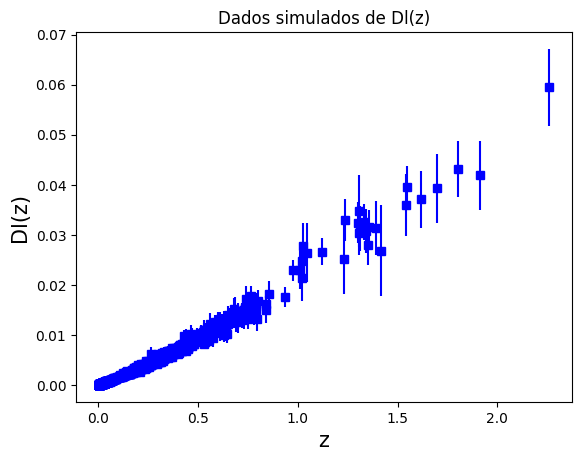

In [16]:
# baixando os dados
data = np.genfromtxt('/content/mu.dat', delimiter='\t')

zCMB = data[:, 0]
mu_gapp = data[:, 1]

sig_mu = data[:, 2]

c = 2.9*10**5 # velocidade da luz

# convertendo para a distância de luminosidade
Dl= (np.power(10, ((mu_gapp-25)/5))) / c

# erro da distância de luminosidade
Dlerr = (np.sqrt(((2**((mu_gapp/5)-5)*(5**((mu_gapp/5)-6))*np.log(10))**2)*((sig_mu)**2))) / c


# plote

plt.xlabel('z', fontsize=15)
plt.ylabel('Dl(z)', fontsize=15)
plt.title('Dados simulados de Dl(z)')
plt.errorbar(zCMB, Dl, Dlerr, fmt='s', color='blue')
plt.show()

Ndl = zCMB, Dl, Dlerr
#np.savetxt('dlc_snia.dat', np.transpose(Ndl), delimiter='\t')

In [13]:
# baixando os dados
data = np.genfromtxt('/content/drive/MyDrive/Códigos/GaPP SNIa/fsig8_full_data.dat', delimiter='\t')

z = data[0]
fs8 = data[1]
sig_fs8 = data[2]



# salvando os dados

Nmu = z, fs8, sig_fs8
#np.savetxt('fs8_full.csv', np.transpose(Nmu), delimiter='\t')